#**Analysis of the Correlation Between COVID-19 and the Stock Market**
##Spring 2025 Data Science Project
###Authors: Chris Zhang, Saloni Shah, Valentina Hong, Rhea Choudhury

**Contributions:**

**A: Project idea -** Chris Zhang, Saloni Shah, and Valentina Hong decided on the project idea (Rhea hadn't joined the group yet).

**B: Dataset Curation and Preprocessing -** Chris Zhang, Saloni Shah, and Valentina Hong selected the datasets needed for the project and ensuring that they were suitable to do analyses on (Rhea hadn't joined the group yet).

**C: Data Exploration and Summary Statistics -** Chris Zhang cleaned the data and did the summary statistics. Saloni Shah, Valentina Hong, and Rhea Choudhury each did a basic data exploration hypothesis test.

**D: ML Algorithm Design/Development -** Saloni Shah answered the first question we posed, Rhea Choudhury answered the second question we asked, and Chris Zhang answered the third question we posed.

**E: ML Algorithm Training and Test Data Analysis -** Saloni Shah answered the first question we posed, Rhea Choudhury answered the second question we asked, and Chris Zhang answered the third question we posed.

**F: Visualization, Result Analysis, Conclusion -** Saloni Shah created a visualization for the first question, Rhea Choudhury created a visualization for the second question, Chris Zhang created a visualization for the third question, and Valentina Hong did most of the writing for the intro and conclusion.

**G: Final Tutorial Report Creation -** All of us worked on creating the final report.


# **2. INTRODUCTION**

We all remember the COVID-19 pandemic; schools closed, stores closed, and much of the world slowed down. The COVID-19 pandemic was a completely unexpected pandemic in how quickly it spread and how much impact it had on countries all over the world. As a result, many countries issued stay-at-home orders, which greatly slowed the economy due to people quarantining at home. Therefore, we're interested in exploring the ways in which the pandemic affected the economy through analyzing stock market trends before, during, and after the pandemic.

To do this, we posed three questions:

1.) How did major stock indices behave across these periods? \
2.) How did COVID-19 trends impact trading volume? \
3.) Can we group stocks based on their behavior during the different key periods?

Answering these questions will allow us to better understand how the stock market was affected by the pandemic, and as a result, give us a better understanding of how financial markets and the economy respond to global crises. Beyond personal interest, the insights we can generate from this project can also assist investors and policymakers in preparing for similar potential events. Through understanding the pandemic's effect on financial markets, we aim to better understand how to make better decisions in times of uncertainty.

# **3. DATA CURATION/PREPROCESSING**

### Imports

Note that we are using the Yahoo Finance Python library for some parts of this project (answering the first question from our introduction when we compare multiple stock indexes).

**Citation:**

Ran, R. (2019). *yfinance: Yahoo! Finance market data downloader* (Version 0.2.59) [Computer software]. https://github.com/ranaroussi/yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import yfinance as yf
import time

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.cluster import KElbowVisualizer

Let's load in our first dataset which we pulled from Kaggle (https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023).

**Citation:**

Suruchi Arora. (2024, February). Yahoo Finance Dataset (2018-2023), Version 1. Retrieved February 20, 2025 from https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023/data.

In [3]:
df = pd.read_excel('yahoo_data.xlsx', engine='openpyxl')  # load the stock data

print(df.isna().sum())

df['Date'] = pd.to_datetime(df['Date'])

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


It doesn't look like there are any nulls in our financial dataset so we can continue on to loading in our COVID-19 dataset, which we will use later on in this tutorial. This COVID-19 dataset was taken from the New York Times GitHub Repository (https://github.com/nytimes/covid-19-data/blob/master/us.csv).

**Citation:**

The New York Times. (2021). *Coronavirus (Covid-19) data in the United States* [Data set]. GitHub. https://github.com/nytimes/covid-19-data

In [4]:
# load in the other dataset for daily COVID-19 cases in the US
us_df = pd.read_csv('us.csv')

print(us_df.isna().sum())

# standardize date format
us_df['date'] = pd.to_datetime(us_df['date'])
us_df = us_df.rename(columns={'date': 'Date'})

date      0
cases     0
deaths    0
dtype: int64


We don't have any nulls in this dataset either, so we can move on to the next section.

##Summary Statistics

In [5]:
print(f'Entries and features: {df.shape}\n') #number of entries and features
print(f'Column names: {df.columns}\n') #column names
print(f'Column types: {df.dtypes}\n') #column types
print(f'Summary statistics: {df.describe()}\n') #summary statistics

Entries and features: (1258, 7)

Column names: Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

Column types: Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object

Summary statistics:                                 Date          Open          High  \
count                           1258   1258.000000   1258.000000   
mean   2020-10-28 09:39:12.305246464  29595.823045  29776.945739   
min              2018-05-01 00:00:00  19028.360000  19121.010000   
25%              2019-07-31 06:00:00  26041.267500  26163.155000   
50%              2020-10-27 12:00:00  29201.410000  29335.685000   
75%              2022-01-26 18:00:00  33604.027500  33825.445000   
max              2023-04-28 00:00:00  36722.600000  36952.650000   
std                              NaN   4006.078299   4009.0

# **4. EXPLORATORY DATA ANALYSIS**

## Basic Data Exploration (Part 1)

For this first hypothesis test, we decided to analyze whether or not a stock's opening price and closing price were correlated. In order to test this, we decided on a paired t-test, as the two values we are measuring (opening and closing price) are related since they are associated with the same stock.

Here, our null hypothesis is that there is no difference between opening and closing prices, and our alternative hypothesis is that there is a difference between opening and closing prices.

Our test returned a p-value of 0.65, which is greater than 0.05. Therefore, we fail to reject the null hypothesis here.

We then decided to represent this data in a scatterplot, as it best highlights the relationship between these two quantitative variables. From this scatterplot, we can also see that there does not appear to be a significant difference between opening and closing prices for a stock, since the scatterplot appears extremely linear with a slope of 1

0.6518081102848816


Text(0.5, 1.0, 'Opening vs. Closing Values for Stocks Between 2018 and 2023')

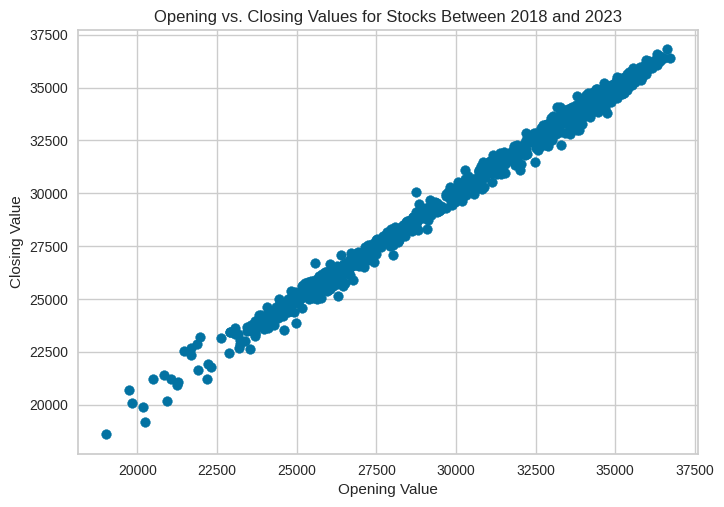

In [6]:
result = stats.ttest_rel(df['Open'], df['Close*']) # paired t-test
print(result.pvalue)

plt.scatter(df['Open'], df['Close*'])
plt.xlabel("Opening Value")
plt.ylabel("Closing Value")
plt.title("Opening vs. Closing Values for Stocks Between 2018 and 2023")

## Basic Data Exploration (Part 2)

For our second statistical method, we decided to analyze the differences between stock prices before, during, and after the COVID-19 pandemic. We decided to do an ANOVA test on the mean closing prices from 2018, 2020, and 2023 to try to determine if the pandemic had an impact on our data.

Our null hypothesis was that there was no significant differences between the closing prices in 2018, 2020, and 2023.

Our alternative hypothesis was that there was a significant difference between the closing prices in 2018, 2020, and 2023.

An ANOVA test on the adjusted closing prices for each of the three years resulted in a p-value of about 2.36e-125, which is less than 0.05. So, we reject the null hypothesis.

To show the data, we decided to create a bar chart to show the differences between these sets of categorical data. From the graph, we can see that 2018 and 2020 are slightly different from each other. The mean for 2023 is much larger than the other two. This graph reinforces what our p-value told us, which is that it is likely there is a difference between the closing prices for the three years. Without additional information, it is difficult to determine if it was actually the pandemic that caused this result, since there could be other contributing factors to consider.

p-value: 2.3646544087200704e-125


Text(0.5, 1.0, 'Year vs. Closing Price in 2018, 2020, and 2023')

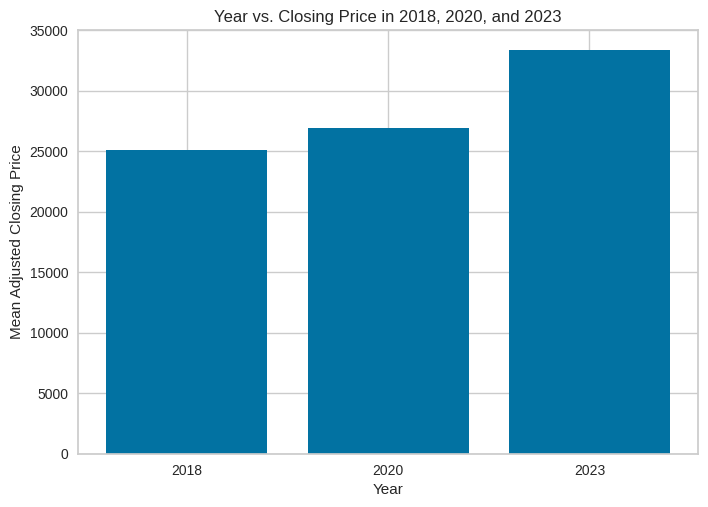

In [7]:
closing_2018 = df[df['Date'].dt.year == 2018]['Adj Close**']
closing_2020 = df[df['Date'].dt.year == 2020]['Adj Close**']
closing_2023 = df[df['Date'].dt.year == 2023]['Adj Close**']

anova_result = stats.f_oneway(closing_2018, closing_2020, closing_2023)   # ANOVA test
print(f'p-value: {anova_result.pvalue}')

means = [closing_2018.mean(), closing_2020.mean(), closing_2023.mean()]
plt.bar(['2018', '2020', '2023'], means)
plt.xlabel('Year')
plt.ylabel('Mean Adjusted Closing Price')
plt.title('Year vs. Closing Price in 2018, 2020, and 2023')

## Basic Data Exploration (Part 3)

For the final statistical method, we decided to conduct a correlation analysis to determine whether or not stock prices and COVID-19 cases had any relationship. To do this, we will measure Pearson's Correlation Coefficient to measure the linear relationship between COVID-19 cases and stock prices.

In this case, our null hypothesis (H0) is that there is no correlation between COVID-19 cases and stock prices.

Our alternative hypothesis (HA) is that there is a significant correlation between COVID-19 cases and stock prices.

If we take a look at the p-value, we note that is it < 0.05, thus allowing us to reject the null hypothesis. This means that the correlation between COVID-19 cases and stock prices is unlikely to be due to random chance. The Pearson's Correlation Coefficient of approximately 0.586 shows us that there is a moderate positive correlation between stock prices and COVID-19 cases.

Pearson Correlation Coefficient: 0.5861691649049813
p-value: 5.413976696145701e-75


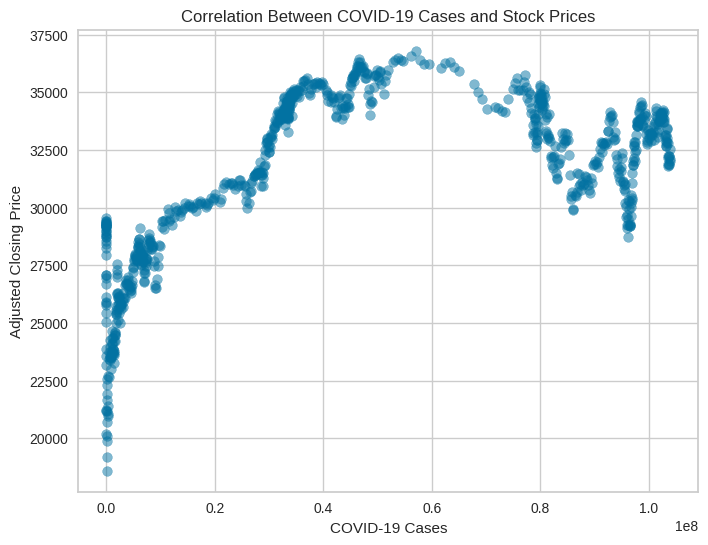

In [8]:
# merge the datasets on the date column
merged_df = pd.merge(df, us_df, on='Date', how='inner')

correlation, p_value = stats.pearsonr(merged_df['cases'], merged_df['Adj Close**'])
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'p-value: {p_value}')

# scatter plot to visualize the correlation
plt.figure(figsize=(8,6))
plt.scatter(merged_df['cases'], merged_df['Adj Close**'], alpha=0.5)
plt.xlabel('COVID-19 Cases')
plt.ylabel('Adjusted Closing Price')
plt.title('Correlation Between COVID-19 Cases and Stock Prices')
plt.show()

# **5a. How did major stock indices behave across these periods?**

To start off, we will be analyzing how various stock indices (such as the Dow Jones, S&P 500, and NASDAQ) performed during a pre-, during, and post COVID timeline.

We categorize January 2018 - March 2020 as pre-COVID, March 2020 - December 2021 as during-COVID, and January 2022 - December 2024 as post-COVID.

We will start off by downloading the various libraries necessary.

In [9]:
!pip install yfinance scikit-learn pandas matplotlib seaborn

Here, we will download the data of each of the biggest markets in the U.S. using the symbols associated with them:

*   S&P 500 - GSPC
*   NASDAQ - IXIC
*   New York Stock Exchange - NYA

While running this, we noticed that we ran into a rate-limit when continuously fetching the data, so we decided to store the information associated with each index into a CSV and just read from there.

In [10]:
# define symbols
symbols = {
    'NYSE Composite': '^NYA',
    'S&P 500': '^GSPC',
    'NASDAQ': '^IXIC',
}

# download and save each to CSV
for name, symbol in symbols.items():
    print(f"Downloading {name}...")
    df = yf.download(symbol, start='2018-01-01', end='2024-12-31', progress=False)
    df = df[['Close']].copy()
    df['Index'] = name
    df['Date'] = df.index
    #df.to_csv(f"{name.replace(' ', '_')}.csv", index=False)
    time.sleep(10)  # need to pause to avoid rate limit

YF.download() has changed argument auto_adjust default to True


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^NYA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^IXIC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [11]:
# Read NASDAQ CSV and fix columns
df_nasdaq = pd.read_csv('NASDAQ.csv', skiprows=2)
df_nasdaq.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date'])
df_nasdaq = df_nasdaq[['Date', 'Close']].copy()
df_nasdaq['Index'] = 'NASDAQ'

# Read S&P 500 CSV and fix columns
df_sp = pd.read_csv('S&P_500.csv', skiprows=2)
df_sp.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_sp['Date'] = pd.to_datetime(df_sp['Date'])
df_sp = df_sp[['Date', 'Close']].copy()
df_sp['Index'] = 'S&P 500'

# Read NYSE CSV and fix columns
df_nyse = pd.read_csv('NYSE_Composite.csv', skiprows=2)
df_nyse.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_nyse['Date'] = pd.to_datetime(df_nyse['Date'])
df_nyse = df_nyse[['Date', 'Close']].copy()
df_nyse['Index'] = 'NYSE Composite'

# combine all the dfs
combined_df = pd.concat([df_sp, df_nasdaq, df_nyse]).reset_index(drop=True)
print(combined_df.head())

        Date        Close    Index
0 2018-01-02  2695.810059  S&P 500
1 2018-01-03  2713.060059  S&P 500
2 2018-01-04  2723.989990  S&P 500
3 2018-01-05  2743.149902  S&P 500
4 2018-01-08  2747.709961  S&P 500


Next, we want to classify each of the dates as we defined above. We need to make sure that the `Date` column is in `datetime` format, so we will convert that first. We also need to drop all the invalid dates.

In [12]:
def label_period(date):
    if date < pd.to_datetime('2020-03-01'):
        return 'Pre-COVID'
    elif pd.to_datetime('2020-03-01') <= date <= pd.to_datetime('2021-12-31'):
        return 'During-COVID'
    else:
        return 'Post-COVID'

# convert date column to datetime format and drop invalid dates
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')
combined_df = combined_df.dropna(subset=['Date'])

# apply the labelling
combined_df['Period'] = combined_df['Date'].apply(label_period)

# number of days since the beginning of the timeline (January 1st, 2018)
combined_df['Days'] = (combined_df['Date'] - combined_df['Date'].min()).dt.days
combined_df = pd.get_dummies(combined_df, columns=['Period'], drop_first=False)
for col in ['Period_During-COVID', 'Period_Post-COVID']:
    if col not in combined_df.columns:
        combined_df[col] = 0
combined_df.head()

,Date,Close,Index,Days,Period_During-COVID,Period_Post-COVID,Period_Pre-COVID
0,2018-01-02,2695.810059,S&P 500,0,False,False,True
1,2018-01-03,2713.060059,S&P 500,1,False,False,True
2,2018-01-04,2723.989990,S&P 500,2,False,False,True
3,2018-01-05,2743.149902,S&P 500,3,False,False,True
4,2018-01-08,2747.709961,S&P 500,6,False,False,True


## Training the model

For this part, we will be using a polynomial regression model for each of the indexes to capture how each index changed over time and compare their behaviors. The reason we are using a polynomial model with degreen 3 is because we want to be able to capture the trend of dips and rebounds in the stock market. A degree 4 model might overfit the data.

In [13]:
models = {}
results = []

for index in combined_df['Index'].unique():
    df_i = combined_df[combined_df['Index'] == index]
    X = df_i[['Days', 'Period_During-COVID', 'Period_Post-COVID']].copy()
    y = df_i['Close']

    model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)

    combined_df.loc[df_i.index, 'Predicted'] = y_pred

    r2 = r2_score(y, y_pred)
    models[index] = model
    results.append((index, r2))

## 6a. Visualization

Now that we have trained the model, we want to see what the plot will look like. The actual stock prices will be a solid line and the predicted will be the dotted version.

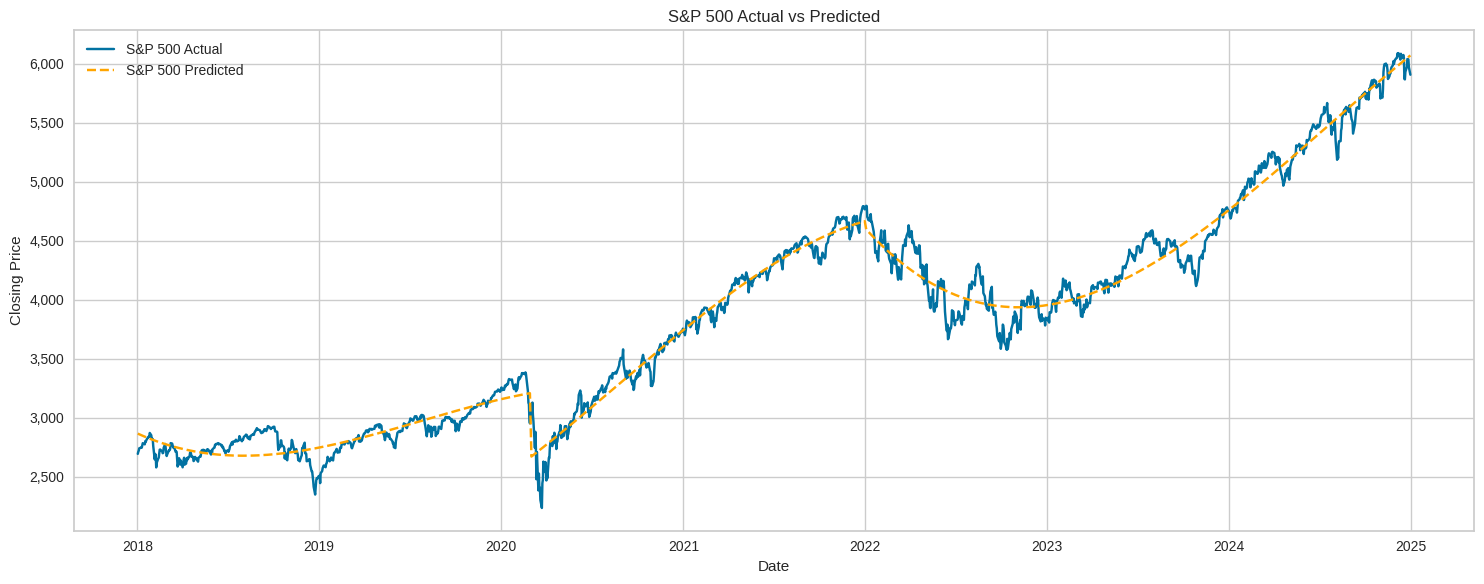

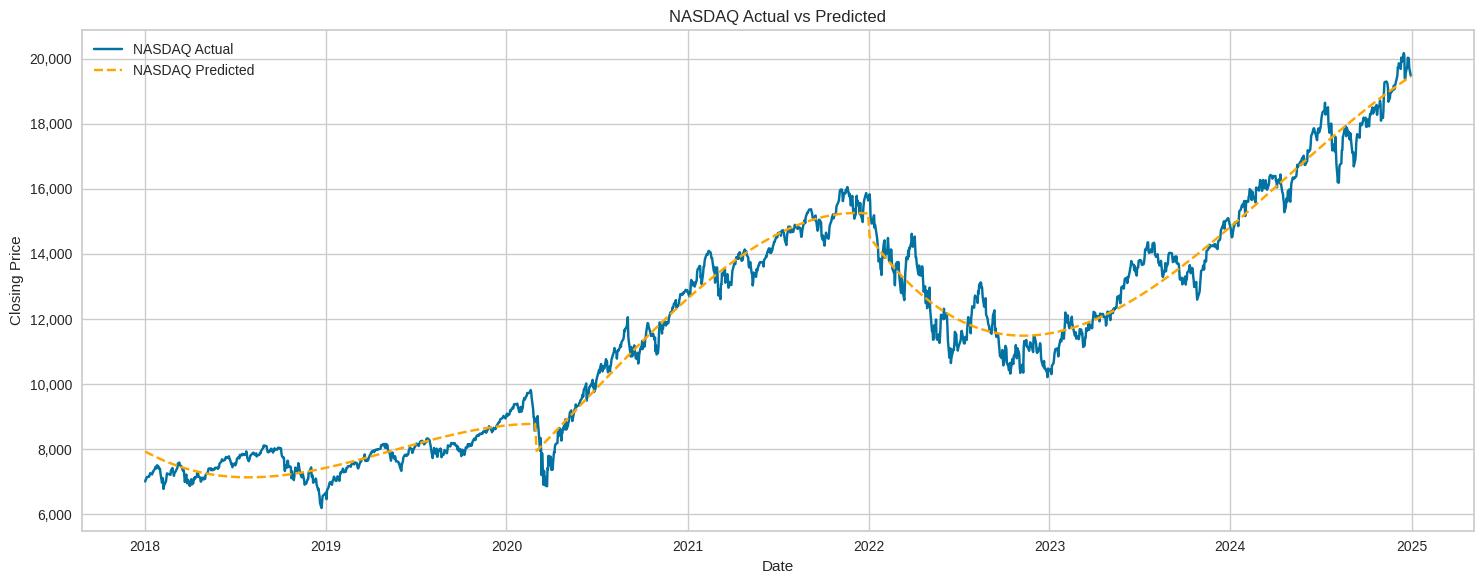

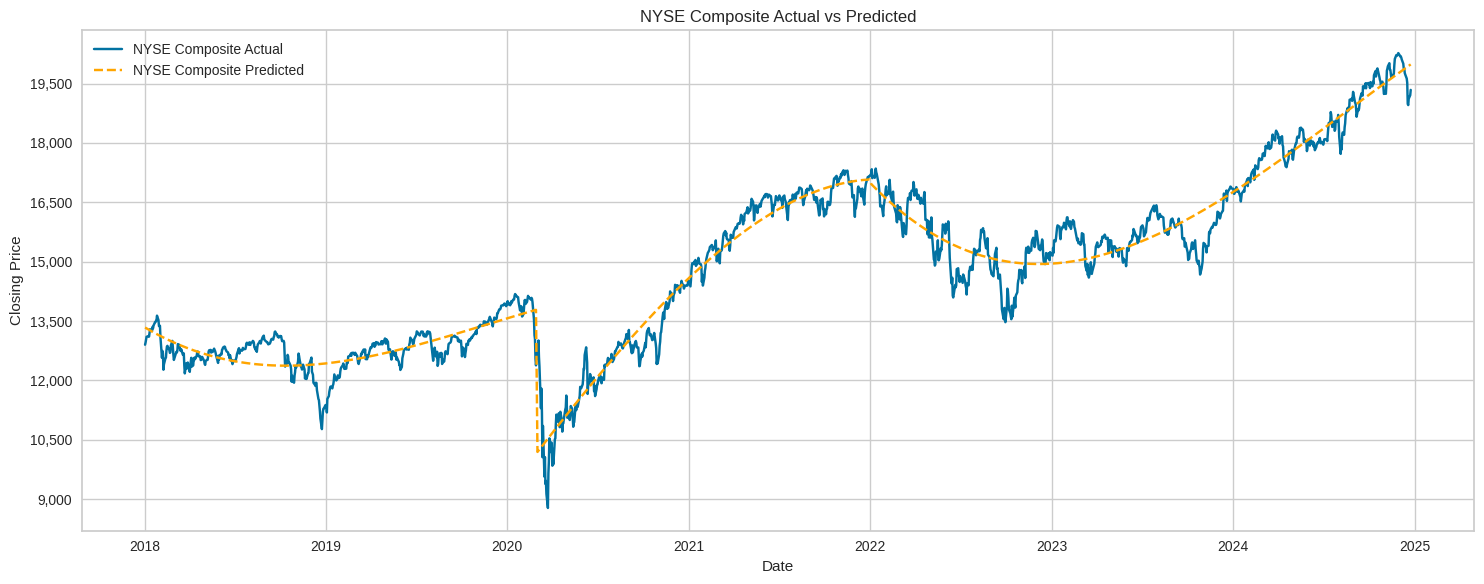

In [14]:
for index in combined_df['Index'].unique():
    df_i = combined_df[combined_df['Index'] == index].copy()

    # filter out the extreme predictions
    df_i = df_i[(df_i['Predicted'] < 20000) & (df_i['Predicted'] > 0)]

    # for debugging purposes
    # print(f"{index} points to plot:", len(df_i))

    # sort by Date and get sorted input features
    df_i = df_i.sort_values('Date')

    X_sorted = df_i[['Days', 'Period_During-COVID', 'Period_Post-COVID']]
    y_sorted_pred = models[index].predict(X_sorted)

    # clip extreme values to avoid weird curves
    y_sorted_pred = np.clip(y_sorted_pred, 0, 20000)

    # plot actual and predicted
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df_i, x='Date', y='Close', label=f'{index} Actual')
    plt.plot(df_i['Date'], y_sorted_pred, label=f'{index} Predicted', linestyle='--', color='orange')
    plt.title(f'{index} Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')

    # get the current axes
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
for index, r2 in results:
    print(f"\n{index} Model")
    print(f"  R² Score: {r2:.4f}")


S&P 500 Model
  R² Score: 0.9827

NASDAQ Model
  R² Score: 0.9767

NYSE Composite Model
  R² Score: 0.9559


## Interpretations for each model

S&P 500 Model Interpretation
*   R² Score: 0.9827 - This means that our model explains 98% of the variation in S&P 500 prices, which is an extremely strong correlation.
*   This model captures the steady, pre-COVID upward trend in stock prices, the dip during COVID, and the post-COVID recovery.
*   The high R² score could initially raise some warning signs, but after a manual inspection of the stock market, we can see that the predictions are pretty solid.

NASDAQ Model Interpretation
*   R² Score: 0.9767 - This means that our model explains 97% of the variation in NASDAQ prices, which is an extremely strong correlation.
*   Since the NASDAQ is a tech-heavy stock index, it captured the boom in the tech market pre- and during COVID and the relative volatility post-COVID.

NYSE Composite Model
*   R² Score: 0.9559 - This means that our model explains 95% of the variation in NYSE prices, which is an extremely strong correlation.
*   Since the NYSE covers a more broad range of stocks, the model's R² Score was lower since it couldn't account for all the fluctuations.

# **5b. Did COVID-19 trends impact trading volume?**

For this section, we'll see if including COVID case data helps us predict trading volume across the time period by comparing two linear regressions. First, we'll need to make some changes to the data to make it easier for our regression model to analyze. To start, we'll use 7-day averages for the COVID cases to help deal with any outliers that might exist on a day-to-day basis. We'll also make a column for returns by calculating the percent change in closing price, since they are a key component of changes in trading volume.

In [16]:
vol_df = merged_df.copy()

# create weekly averages of COVID cases
vol_df["7_day_avg"] = vol_df["cases"].rolling(window=7).mean()

# Make return column
vol_df["Return"] = vol_df["Close*"].pct_change()

# drop rows with NaN (that come from the average or otherwise)
vol_df = vol_df.dropna()
vol_df = vol_df.sort_index()    # make sure it's ordered by date

# for X
X_with_covid = vol_df[["Open", "High", "Low", "Adj Close**", "Return", "7_day_avg"]]   # we'll use these features
X_no_covid = vol_df[["Open", "High", "Low", "Adj Close**", "Return"]]

# for Y
Y_vol = vol_df.loc[X_no_covid.index, "Volume"]

Financial data often has high correlation, because many features are related. We'll standardize our data and then apply PCA to reduce dimensionality, which should help with this.

In [17]:
vol_scaler = StandardScaler()

# scale data BEFORE PCA
X_scaled = vol_scaler.fit_transform(X_no_covid)
X_covid_scaled = vol_scaler.fit_transform(X_with_covid)

# apply PCA on the data
X_pca = PCA().fit_transform(X_scaled)
X_covid_pca = PCA().fit_transform(X_covid_scaled)

We'll also split the data so that the training and testing sets contain 80% and 20% of the data respectively.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_vol, train_size=0.8, shuffle = False, random_state = 42)
X_covid_train, X_covid_test, Y_covid_train, Y_covid_test = train_test_split(X_covid_pca, Y_vol, train_size=0.8, shuffle = False, random_state = 42)

## Training the model

In [19]:
# initialize the regression models
model_1 = LinearRegression()
model_2 = LinearRegression()

# training the models
no_covid_model = model_1.fit(X_train, Y_train)
covid_model = model_2.fit(X_covid_train, Y_covid_train)

# predict using the models
no_covid_pred = no_covid_model.predict(X_test)
covid_pred = covid_model.predict(X_covid_test)

# calculate r^2 and MSE
mse_no_covid = mean_squared_error(Y_test, no_covid_pred)
mse_covid = mean_squared_error(Y_covid_test, covid_pred)
r2_no_covid = r2_score(Y_test, no_covid_pred)
r2_covid = r2_score(Y_covid_test, covid_pred)

print(f"For the model with no COVID data, R^2 was {r2_no_covid:.4f} and MSE was {mse_no_covid:.2e}")
print(f"For the model with COVID data, R^2 was {r2_covid:.4f} and MSE was {mse_covid:.2e}")

For the model with no COVID data, R^2 was 0.6920 and MSE was 6.89e+15
For the model with COVID data, R^2 was 0.7144 and MSE was 6.39e+15


## 6b. Visualization

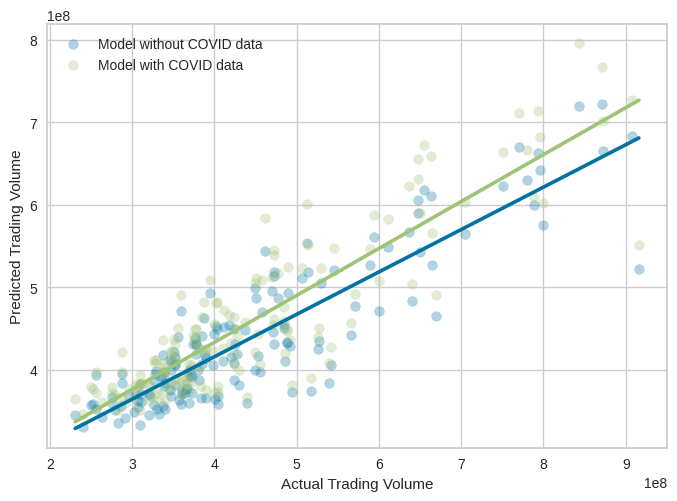

In [20]:
# plot the test data
plt.scatter(Y_test, no_covid_pred, alpha = 0.3, label = f"Model without COVID data")
plt.scatter(Y_test, covid_pred, alpha = 0.3, label = f"Model with COVID data")

# we're trying to plot the actual vs. predicted trading volume
sns.regplot(x = Y_test, y = no_covid_pred, scatter = False, ci = None)
sns.regplot(x = Y_test, y = covid_pred, scatter = False, ci = None)

plt.xlabel("Actual Trading Volume")
plt.ylabel("Predicted Trading Volume")
plt.legend()
plt.show()

## Interpretation

We can see that the model that includes the 7-day average COVID cases performs better when predicting the test data. This is evident from the R^2 values, which are 0.6920 and 0.7144 for the data without and with COVID respectively. Both values indicate a strong positive correlation between the aforementioned features and trading volume, with the data explaining 69.2% and 71.44% of the variability in trading volume respectively. \
The R^2 for the regression that includes COVID data is 0.0224 higher, which shows that the data accounts for more of the variability (2.24% more) in trading volume than the regression without COVID data. The MSE (mean squared error) is also lower for the model with COVID data: 6.89e+15 compared to 6.39e+15.

This conclusion is also supported by the visualization. For a linear regression, when we plot the actual vs. expected dependent variables, we are looking to get a line with a slope of 1. We can see that the green line, the one that comes from the model with COVID data, is closer to what we want than the other line. From this, we can conclude that including COVID case data in our trading volume prediction model helps, even if only by a little. In other words, COVID cases across the pandemic time period are likely to have had some impact on trading volume.

#**5c. Can we group stocks based on their behavior during the different key periods?**


While it is widely believed that COVID-19 had a significant impact on the stock market, it is important to test this assumption with data. Therefore, in this section we aim to determine whether there were distinct patterns in stock behavior during the COVID-19 era. If the pandemic did influence the market in some sort of way, we would expect stock data from that period to form distinct clusters, separate from those of the pre-COVID and post-COVID periods.

Our time periods will classify: January 2018 - March 2020 as pre-COVID, March 2020 - December 2021 as during-COVID, and January 2022 - December 2024 as post-COVID.

To begin our analysis, we need to first clean the dataset and perform feature engineering to enhance its informational value. We then need to normalize the data using z-scores to ensure that each feature is weighed equally by the clustering process. Finally, we need to apply PCA dimensionality reduction to improve the performance of K-Means clustering and also make the data easier to visualize.

In [21]:
#Cleaning:
# Deal with nulls
# Convert date to datetime
df = pd.read_excel('yahoo_data.xlsx', engine='openpyxl')
print(df.isna().sum()) #No nulls in the dataset
print('\n')
df['Date'] = pd.to_datetime(df['Date'])

#Feature Engineering:
# Use daily returns: (Close - Open)/Open
df['Daily Return'] = (df['Close*'] - df['Open']) / df['Open']

#Normalization:
# Use z-scoring to normalize all my columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume', 'Daily Return']])
print(df.isna().sum())

#Dimensionality Reduction:
# Use PCA to reduce to 2-D for easy visualization
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


Date            0
Open            0
High            0
Low             0
Close*          0
Adj Close**     0
Volume          0
Daily Return    0
dtype: int64


Next, we can set up our model to use K-Means Clustering to identify meaningful patterns in the stock data. However, before running the algorithm, we first need to determine the optimal number of clusters to use. We will use the Elbow Method to do this.

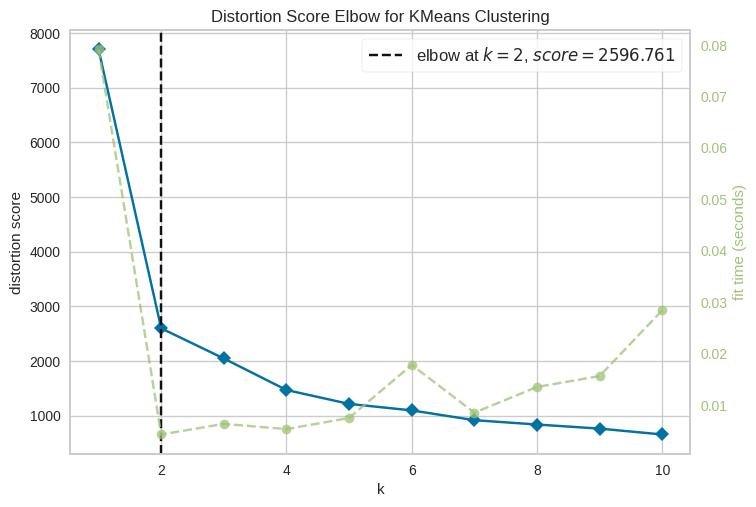

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
#KMeans Clustering

#inertia = []
#for k in range(1, 11):
#  kMeansModel = KMeans(n_clusters=k, random_state=42).fit(df_reduced)
#  inertia.append(kMeansModel.inertia_)
#plt.plot(range(1, 11), inertia, marker='o')
#plt.xlabel('K Value')
#plt.ylabel('Inertia')
#plt.show()

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df_reduced)
visualizer.show()

Now that we're ready, we will set up our K-Means model.

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_reduced)

df['Cluster Group'] = kmeans.labels_

##6c. Visualization

Next, we will visualize our data. We will plot our dimensionally reduced data onto a 2-D plane and show the cluster boundaries so that we can visualize which cluster each point belongs to. Then, we will also color-code each data point to identify which "key period" it belongs to. This way, we will be able to identify any patterns or trends, such as whether stocks from the same "key period" tend to cluster together or exhibit similar behavior.

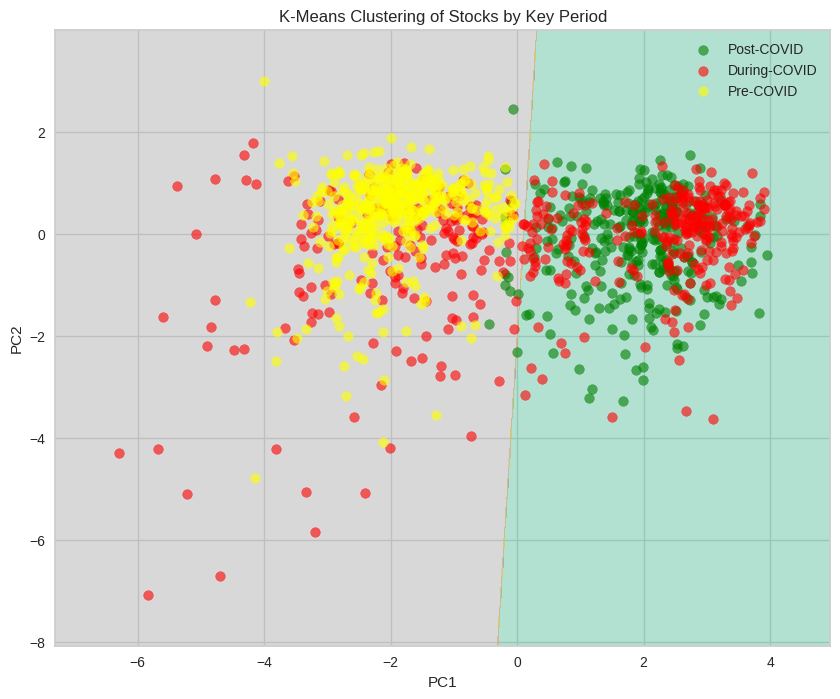

In [24]:
#Visualization
df['Key Period'] = df['Date'].apply(lambda x: 'Pre-COVID' if x < pd.Timestamp('2020-03-01')
else ('During-COVID' if x < pd.Timestamp('2021-12-31') else 'Post-COVID'))

h = 0.01 #decides the step size of the grid
x_min, x_max = df_reduced[:, 0].min() - 1, df_reduced[:, 0].max() + 1 #pc1; the -1 and +1 are to make the graph pretty
y_min, y_max = df_reduced[:, 1].min() - 1, df_reduced[:, 1].max() + 1 #pc2; the -1 and +1 are to make the graph pretty
all_x, all_y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predicted_cluster_labels = kmeans.predict(np.c_[all_x.flatten(), all_y.flatten()])
predicted_cluster_labels = predicted_cluster_labels.reshape(all_x.shape)

#create dictionary for legend
color_dict = {'Pre-COVID': 'yellow', 'During-COVID': 'red', 'Post-COVID': 'green'}

plt.figure(figsize=(10, 8))

#plot the decision boundaries
plt.contourf(all_x, all_y, predicted_cluster_labels, cmap='Set2', alpha=0.5)

#color the data points according to their time periods
for period in df['Key Period'].unique():
    true_for_curr_period = df['Key Period'] == period
    plt.scatter(df_reduced[true_for_curr_period, 0], df_reduced[true_for_curr_period, 1],
                c=color_dict[period], label=period, alpha=0.6)

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of Stocks by Key Period')
plt.show()

As can be seen by the scatterplot, stocks from the Pre-COVID and Post-COVID periods tend to group closely together, forming relatively distinct clusters. However, the data from the During-COVID period is all over the place, crossing the decision boundary between the two major clusters. Therefore, we can conclude that while there are general patterns that can be noticed in Pre-COVID stocks and Post-COVID stocks, stocks during the COVID-19 pandemic behaved in an unpredictable way.

#**7. Insights and Conclusions**

Our final project walked through the entire data science pipeline for analyzing data related to financial markets and COVID-19.

For those who are perhaps more unfamiliar with these fields or the data science pipeline, we believe that they will be able to gain insights into these topics since we thoroughly walked through each step and explained our logic behind our decisions. For example, even though our datasets required minimal cleaning, we still showed the process of how one would clean, and then explained why we didn't specifically need to clean. For someone who is more familiar with financial markets or the data science pipeline, this may seem a little trivial but at the same time, can be a useful refresher about the process of finding and cleaning data.

Additionally, we then showed our thought processes in regards to exploratory data analysis. For a potential uninformed reader, we believe that we showed clear logic behind the tests that we conducted (as in, which tests we conducted on what variables, and why), and then explained our results through both numerical data and graphs to illustrate our conclusions. A potential informed reader can also benefit from this due to the multiple ways in which we explained our conclusions (the results from the statistical tests, and then the corresponding graph).

In the next section, we then once again thoroughly explained our research questions and our thought process behind how we solve them. For this section, we also began tying together the two datasets in both our testing and analyses, so we believe that both the uninformed and informed reader will be able to learn either how to tie together data from different datasets, or learn more about the correlation between the COVID-19 pandemic and stock prices. With each model, we also thoroughly walked through our process of preparing data, training, and testing, which illustrates our process and also clearly shows readers how we reached our conclusions. We then conclude this with visuals to once again illustrate everything.

In conclusion, we believe that both the informed and uninformed reader will be able to benefit from reading through our project, whether it be to learn about the data science pipeline, how to connect data from different datasets, or how to interpret these connections in regards to understanding how COVID-19 affectected the financial market.